In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



os.getcwd()

'd:\\Desktop\\bysj\\bysj\\dataset'

In [2]:
train_dir, val_dir = "./train-50", "./val-50"

In [16]:
train_len = len(os.listdir(train_dir))
val_len = len(os.listdir(val_dir))
print(f"train_len: {train_len}, val_len: {val_len}")

train_df = pd.DataFrame({"file_name": [i for i in os.listdir(train_dir)]})
train_df["class"] = train_df["file_name"].apply(lambda x: x.split("-")[1])
val_df = pd.DataFrame({"file_name": [i for i in os.listdir(val_dir)]})
val_df["class"] = val_df["file_name"].apply(lambda x: x.split("-")[1])

print(train_df["class"].value_counts().sort_values(ascending=False), "\n----------------------------------\n", val_df["class"].value_counts().sort_values(ascending=False))

train_len: 6927, val_len: 1418
class
0     145
26    145
4     145
41    145
5     145
38    144
2     143
12    143
16    143
8     143
25    143
3     143
34    143
18    143
37    143
11    143
14    142
20    142
35    141
23    141
9     141
47    141
33    141
28    141
46    140
21    140
1     140
29    140
36    140
6     139
17    139
10    138
15    138
22    138
24    137
32    137
45    136
49    136
30    136
39    135
43    135
31    135
40    135
42    135
13    132
19    129
27    129
48    129
7     121
44    109
Name: count, dtype: int64 
----------------------------------
 class
13    54
46    48
48    42
40    42
33    42
47    38
45    36
42    36
22    34
37    34
3     34
19    34
0     34
2     32
23    32
34    32
9     32
20    32
29    32
30    30
1     30
14    30
31    30
41    28
43    28
32    28
18    26
7     26
35    26
21    26
17    24
10    24
12    24
44    24
36    24
38    24
28    22
26    22
49    22
8     22
27    20
4     20
6     20
25    1

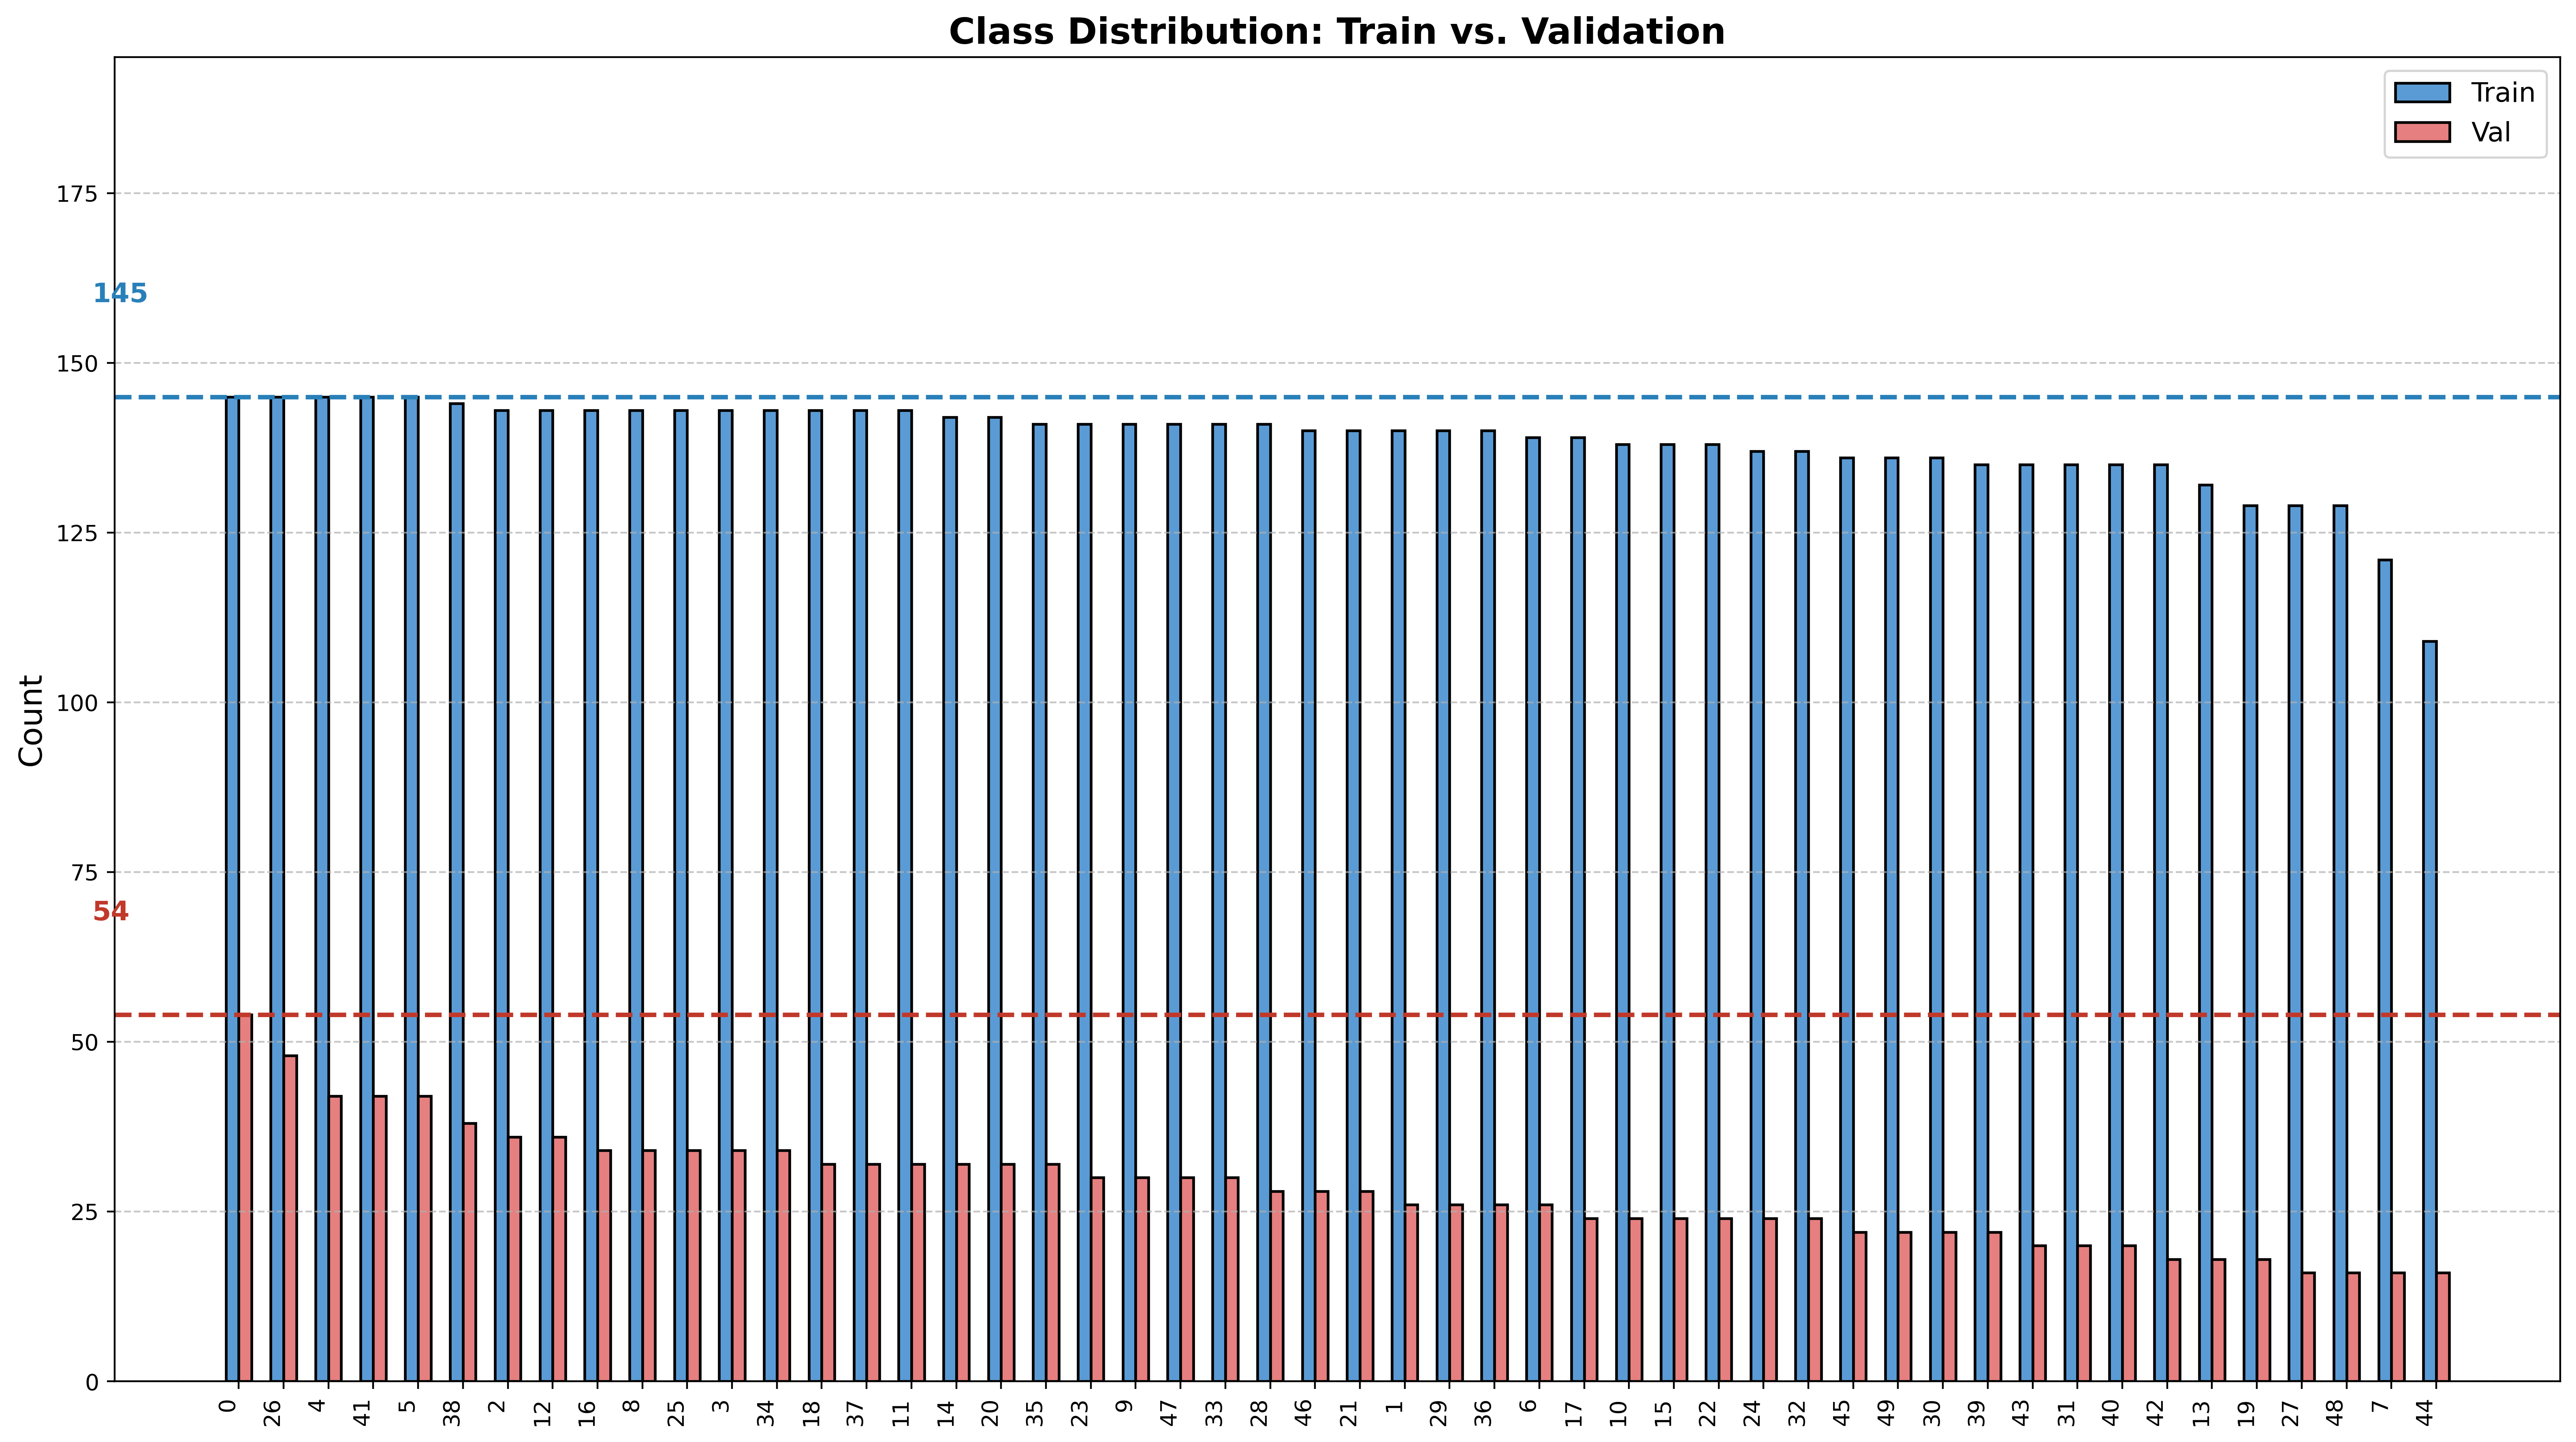

In [17]:
all_classes = train_df["class"].value_counts().index.values

x = np.linspace(0, len(all_classes) * 1.2, len(all_classes))
y1 = train_df["class"].value_counts().values
y2 = val_df["class"].value_counts().values

# 设置图表大小和分辨率
plt.figure(figsize=(16, 9), dpi=400)

# 设置条形图宽度
bar_width = 0.35

# 绘制条形图
plt.bar(x - bar_width/2, y1, width=bar_width, label="Train", color='#5A9BD5', edgecolor='black', linewidth=1.2)
plt.bar(x + bar_width/2, y2, width=bar_width, label="Val", color='#E67F7F', edgecolor='black', linewidth=1.2)

# 添加水平线，并显示其值
max_y1 = y1.max()
max_y2 = y2.max()

plt.axhline(y=max_y1, color='#2980B9', linestyle='--', linewidth=2)
plt.axhline(y=max_y2, color='#C0392B', linestyle='--', linewidth=2)

# 在水平线旁显示对应的值
plt.text(-4, max_y1+15, f'{max_y1}', color='#2980B9', va='center', ha='left', fontsize=12, fontweight='bold')
plt.text(-4, max_y2+15, f'{max_y2}', color='#C0392B', va='center', ha='left', fontsize=12, fontweight='bold')

# 设置x轴标签和旋转角度
plt.xticks(x, all_classes, rotation=90, ha='right')

# 设置y轴范围
plt.ylim(0, max(max_y1, max_y2) + 50)

# 添加标题和坐标轴标签
plt.title("Class Distribution: Train vs. Validation", fontsize=16, fontweight='bold')
plt.ylabel("Count", fontsize=14)

# 添加网格
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 添加图例
plt.legend(fontsize=12)

# 调整布局，确保不被遮挡
plt.tight_layout()

# 显示图表
plt.show()